<a href="https://colab.research.google.com/github/allenlincg/aipractice/blob/main/Colab%E5%AF%A6%E4%BD%9C%EF%BC%9A%E5%BB%BA%E7%AB%8BCIFAR_10%E8%B3%87%E6%96%99%E9%9B%86%E4%B8%8A%E7%9A%84CNN%E5%88%86%E9%A1%9E%E6%A8%A1%E5%9E%8B_%E8%A7%A3%E7%AD%94%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center">
  <img src="https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png"
  />
  <center>Cifar 10 資料庫</center>
  <center>圖片來源: https://www.kaggle.com/</center>
</p>


CIFAR 10 是一個 10 類別資料，包含了：
* 飛機 (airplan)
* 交通工具 (automobile)
* 鳥 (bird)
* 貓 (cat)
* 鹿 (deer)
* 狗 (dog)
* 青蛙 (frog)
* 馬 (horse)
* 船 (ship)
* 卡車 (truck)
共10個類別的資料，在這裡，我們將讓大家練習建構在 CIFAR-10 上的 CNN 分類模型

## 1: 切換 TensorFlow 至 2.x 版

In [ ]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


## 2: 載入套件及資料集

In [ ]:
%matplotlib inline
# Import some useful package
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider, BoundedIntText

# For CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, GlobalAvgPool2D

# For training
from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

## 3: 資料前處理 (Data Preprocessing)

讀取 CIFAR 10 圖片資料集

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [ ]:
# Normalize data range
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 4: 練習建立辨識 CIFAR-10 的卷積神經網路

在這裡，我們希望大家建立具有以下架構的卷積神經網路。

透過改變模型架構以外的其他方式，讓訓練和測試準確率都至少60%。

#### [練習] 模型架構

|超參數/層名| 卷積層  | 池化層 | 卷積層 | 池化層 || 扁平層 | 全連接層 | 全連接層 | 輸出層 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
神經元/filter 個數| 10 | | 16 | | | | 120 | 84 | 10 |
Kernal 尺寸| (5, 5) | (2, 2) | (4, 4) | (2, 2)
|激活函數| ReLU | | ReLU | | | | ReLU | ReLU | softmax |

別忘記第一個卷積層需要指定輸入格式: (32, 32, 3)

In [ ]:
model = Sequential()

model.add(Conv2D(10, (5, 5), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(16, (4, 4), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 10)        760       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        2576      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

### [練習] 嘗試不同設定來編譯模型

- Optimizer:
 * Stochastic Gradient Descent (SGD)
 * Adaptive Moment Estimation (Adam)
- Loss:
 * Mean Squared Error
 * Mean Abolute Error
 * Categorical cross-entropy

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])

### 訓練模型: 透過訓練模型來學習分類資料的函數

In [ ]:
training_history = model.fit(X_train, y_train,
                             batch_size=32,
                             epochs=5,
                             validation_data=(X_test, y_test)
                             )

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 10s 192us/sample - loss: 1.6028 - categorical_accuracy: 0.4119 - val_loss: 1.4170 - val_categorical_accuracy: 0.4780
Epoch 2/5
50000/50000 [==============================] - 9s 181us/sample - loss: 1.3169 - categorical_accuracy: 0.5275 - val_loss: 1.2964 - val_categorical_accuracy: 0.5361
Epoch 3/5
50000/50000 [==============================] - 9s 181us/sample - loss: 1.1993 - categorical_accuracy: 0.5730 - val_loss: 1.1956 - val_categorical_accuracy: 0.5712
Epoch 4/5
50000/50000 [==============================] - 9s 182us/sample - loss: 1.1204 - categorical_accuracy: 0.6027 - val_loss: 1.1449 - val_categorical_accuracy: 0.5943
Epoch 5/5
50000/50000 [==============================] - 9s 181us/sample - loss: 1.0557 - categorical_accuracy: 0.6250 - val_loss: 1.1568 - val_categorical_accuracy: 0.5945


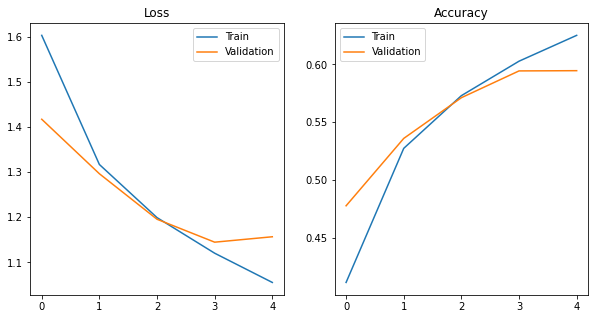

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(training_history.history['categorical_accuracy'])
plt.plot(training_history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Validation'])
plt.title("Accuracy");

## 5: 視覺化預測結果

在這部分，我們提供簡單的視覺化方法來呈現神經網路的輸入與輸出結果

In [ ]:
class_label = ['Airplan', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def visulization(idx=0):
    # Random pick one data from training set
    # idx = np.random.randint(X_train.shape[0])
    sample_x = X_test[idx]
    sample_y = y_test[idx]
    # Predict the class of random data
    predict_y = model.predict(X_test[idx:idx+1]).squeeze()
    predict_label = predict_y.argmax()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    # Plot raw image
    ax1.imshow(sample_x, 'gray_r')
    ax1.set_title("Image Label: %s" %class_label[sample_y.argmax()])

    # Plot prediction probability of each classes
    ax2.barh(np.arange(10), predict_y)
    ax2.patches[predict_label].set_facecolor('Red')
    ax2.set_title(f"Prediction Result: {class_label[predict_label]}");
    # ax2.set_yticklabels(class_label)
    if sample_y.argmax()==predict_y.argmax():
        print("預測正確!")
    else:
        print("預測失敗QQ")
    plt.show()

In [ ]:
interact(visulization, idx=BoundedIntText(value=5566, min=0, max=X_test.shape[0]-1));

interactive(children=(BoundedIntText(value=5566, description='idx', max=9999), Output()), _dom_classes=('widge…